In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

Experimento 1: Comportamiento de la memoria

En el primer experimento se busca indagar sobre el comportamiento de la memoria de MH1 en el algoritmo (la cual guarda soluciones), la misma definirá comportamientos a través de dos parámetros de forma directa: max_it_sin_mejora y aspiracion. Por ejemplo, existe la posibilidad de que el algoritmo termine prematuramente con valores no cercanos al optimo frente a no permitir que pasen suficientes iteraciones sin mejora, pero esto podría darse distinto si la función de aspiración permite que soluciones que fueron encontradas recientemente sean re-visitadas. Se espera que el experimento arroje resultados sobre esto.

In [7]:
df_resultados_mem = pd.read_csv("resultados/resultados-comportamiento_memoria.csv");
df_resultados_mem

,metodo,n,mG,mH,impacto,tiempo,error,maxItSinMejora,aspiracion
0,MH1,16,35,43,20.00,194.969500,0.000000,0,0
1,MH1,30,137,128,47.00,5158.180000,0.000000,0,0
2,MH1,12,16,26,16.00,47.995200,0.000000,0,0
3,MH1,26,98,103,37.05,2349.910000,0.025000,0,0
4,MH1,24,79,72,32.95,1537.740000,0.001515,0,0
...,...,...,...,...,...,...,...,...,...
73,MH1,22,77,58,24.95,930.128000,0.040385,2,2
74,MH1,6,7,2,1.00,1.442025,0.000000,2,2
75,MH1,14,29,25,11.35,88.496150,0.054167,2,2
76,MH1,18,41,54,27.00,354.945000,0.000000,2,2


Por un lado, pruebo analizar los resultados en función de la aspiración

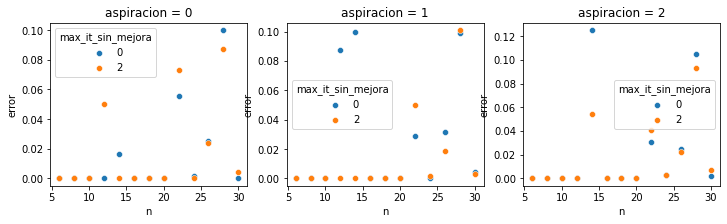

In [9]:
comp_memoria0 = df_resultados_mem[df_resultados_mem["aspiracion"] == 0].copy();
comp_memoria1 = df_resultados_mem[df_resultados_mem["aspiracion"] == 1].copy();
comp_memoria2 = df_resultados_mem[df_resultados_mem["aspiracion"] == 2].copy();

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

axs[0].set_title('aspiracion = 0')
axs[1].set_title('aspiracion = 1')
axs[2].set_title('aspiracion = 2')

axs[0].set(xlabel='n', ylabel='error');
axs[1].set(xlabel='n', ylabel='error');
axs[2].set(xlabel='n', ylabel='error');

axs[0] = sns.scatterplot(data=comp_memoria0[comp_memoria0["maxItSinMejora"] == 0], x='n', y='error', ax=axs[0])
axs[0] = sns.scatterplot(data=comp_memoria0[comp_memoria0["maxItSinMejora"] == 2], x='n', y='error', ax=axs[0])

axs[1] = sns.scatterplot(data=comp_memoria1[comp_memoria1["maxItSinMejora"] == 0], x='n', y='error', ax=axs[1])
axs[1] = sns.scatterplot(data=comp_memoria1[comp_memoria1["maxItSinMejora"] == 2], x='n', y='error', ax=axs[1])

axs[2] = sns.scatterplot(data=comp_memoria2[comp_memoria2["maxItSinMejora"] == 0], x='n', y='error', ax=axs[2])
axs[2] = sns.scatterplot(data=comp_memoria2[comp_memoria2["maxItSinMejora"] == 2], x='n', y='error', ax=axs[2])

axs[0].legend(title="max_it_sin_mejora", labels=['0','2']);
axs[1].legend(title="max_it_sin_mejora", labels=['0','2']);
axs[2].legend(title="max_it_sin_mejora", labels=['0','2']);

plt.savefig("graficos/mh1_res_en_funcion_aspiracion.svg")

Por el otro, pruebo analizar los resultados en función de la máxima cantidad de iteraciones sin mejora

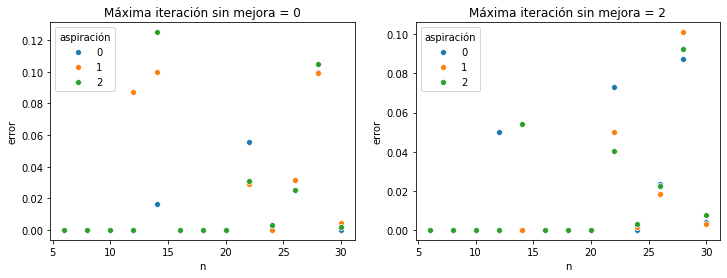

In [9]:
comp_memoria3 = df_resultados_mem[df_resultados_mem["maxItSinMejora"] == 0].copy();
comp_memoria4 = df_resultados_mem[df_resultados_mem["maxItSinMejora"] == 2].copy();

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('Máxima iteración sin mejora = 0')
axs[1].set_title('Máxima iteración sin mejora = 2')

axs[0].set(xlabel='n', ylabel='error');
axs[1].set(xlabel='n', ylabel='error');

axs[0] = sns.scatterplot(data=comp_memoria3[comp_memoria3["aspiracion"] == 0], x='n', y='error', ax=axs[0])
axs[0] = sns.scatterplot(data=comp_memoria3[comp_memoria3["aspiracion"] == 1], x='n', y='error', ax=axs[0])
axs[0] = sns.scatterplot(data=comp_memoria3[comp_memoria3["aspiracion"] == 2], x='n', y='error', ax=axs[0])

axs[1] = sns.scatterplot(data=comp_memoria4[comp_memoria4["aspiracion"] == 0], x='n', y='error', ax=axs[1])
axs[1] = sns.scatterplot(data=comp_memoria4[comp_memoria4["aspiracion"] == 1], x='n', y='error', ax=axs[1])
axs[1] = sns.scatterplot(data=comp_memoria4[comp_memoria4["aspiracion"] == 2], x='n', y='error', ax=axs[1])

axs[0].legend(title="aspiración", labels=['0','1','2']);
axs[1].legend(title="aspiración", labels=['0','1','2']);

plt.savefig("graficos/mh1_res_en_funcion_max_it_sin_mejora.svg")

Adicionalmente, se quiere observar la correlación entre el error obtenido y el tiempo de ejecución

Correlación plt0: 0.42369104496805976
Correlación plt1: 0.11554299961548845
Correlación plt2: 0.18859467759478207
Correlación plt3: 0.31034888484006695
Correlación plt4: 0.4683625007816552
Correlación plt5: 0.3867434894962537


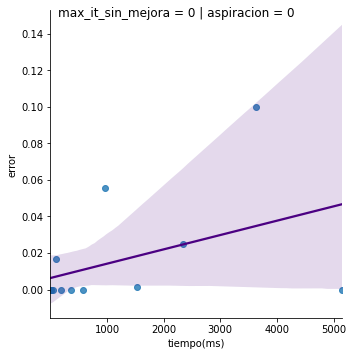

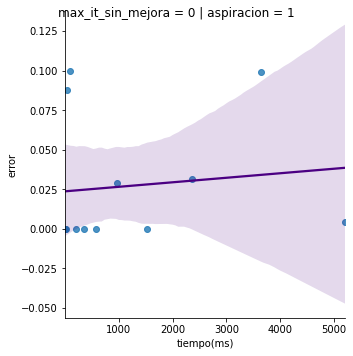

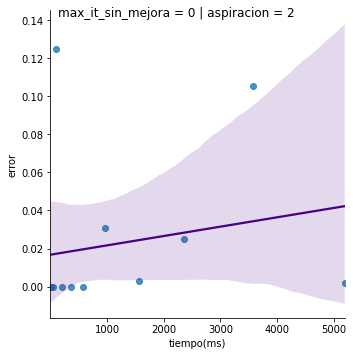

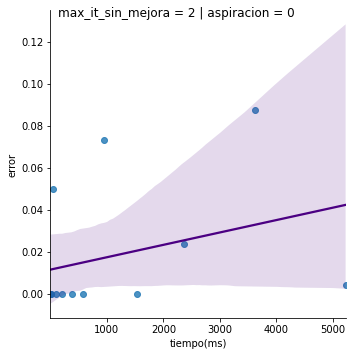

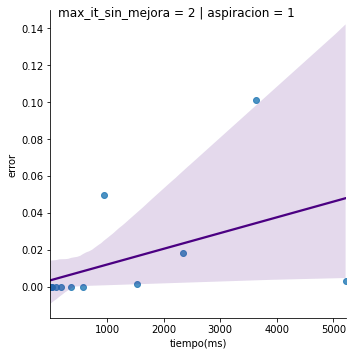

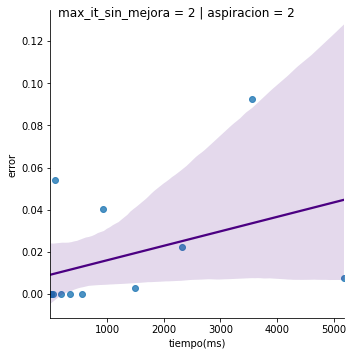

In [78]:
df_correlacion_err_0 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 0 ) & (df_resultados_mem["aspiracion"]== 0 )].copy();
df_correlacion_err_1 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 0 ) & (df_resultados_mem["aspiracion"]== 1 )].copy();
df_correlacion_err_2 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 0 ) & (df_resultados_mem["aspiracion"]== 2 )].copy();
df_correlacion_err_3 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 2 ) & (df_resultados_mem["aspiracion"]== 0 )].copy();
df_correlacion_err_4 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 2 ) & (df_resultados_mem["aspiracion"]== 1 )].copy();
df_correlacion_err_5 = df_resultados_mem[(df_resultados_mem["maxItSinMejora"]== 2 ) & (df_resultados_mem["aspiracion"]== 2 )].copy();

plt0 = sns.lmplot(data=df_correlacion_err_0, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt1 = sns.lmplot(data=df_correlacion_err_1, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt2 = sns.lmplot(data=df_correlacion_err_2, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt3 = sns.lmplot(data=df_correlacion_err_3, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt4 = sns.lmplot(data=df_correlacion_err_4, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt5 = sns.lmplot(data=df_correlacion_err_5, x="tiempo", y="error",line_kws={'color': 'indigo'})

plt0.fig.suptitle('max_it_sin_mejora = 0 | aspiracion = 0')
plt1.fig.suptitle('max_it_sin_mejora = 0 | aspiracion = 1')
plt2.fig.suptitle('max_it_sin_mejora = 0 | aspiracion = 2')
plt3.fig.suptitle('max_it_sin_mejora = 2 | aspiracion = 0')
plt4.fig.suptitle('max_it_sin_mejora = 2 | aspiracion = 1')
plt5.fig.suptitle('max_it_sin_mejora = 2 | aspiracion = 2')

print("Correlación plt0:" , correlacion_pearson(df_correlacion_err_0, "tiempo", "error"));
print("Correlación plt1:" , correlacion_pearson(df_correlacion_err_1, "tiempo", "error"));
print("Correlación plt2:" , correlacion_pearson(df_correlacion_err_2, "tiempo", "error"));
print("Correlación plt3:" , correlacion_pearson(df_correlacion_err_3, "tiempo", "error"));
print("Correlación plt4:" , correlacion_pearson(df_correlacion_err_4, "tiempo", "error"));
print("Correlación plt5:" , correlacion_pearson(df_correlacion_err_5, "tiempo", "error"));

plt0.set(xlabel='tiempo(ms)', ylabel='error')
plt1.set(xlabel='tiempo(ms)', ylabel='error')
plt2.set(xlabel='tiempo(ms)', ylabel='error')
plt3.set(xlabel='tiempo(ms)', ylabel='error')
plt4.set(xlabel='tiempo(ms)', ylabel='error')
plt5.set(xlabel='tiempo(ms)', ylabel='error')

plt0.savefig("graficos/mh1_correlacion0_exp1.svg")
plt1.savefig("graficos/mh1_correlacion1_exp1.svg")
plt2.savefig("graficos/mh1_correlacion2_exp1.svg")
plt3.savefig("graficos/mh1_correlacion3_exp1.svg")
plt4.savefig("graficos/mh1_correlacion4_exp1.svg")
plt5.savefig("graficos/mh1_correlacion5_exp1.svg")


Por último, se quiere observar el error total cometido en cada combinación

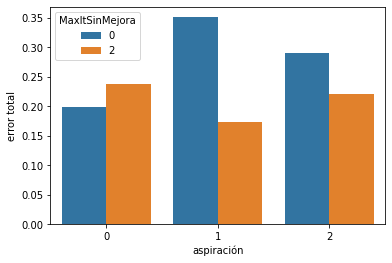

In [79]:
comp_memoria3 = df_resultados_mem[df_resultados_mem["maxItSinMejora"] == 0].copy();
comp_memoria4 = df_resultados_mem[df_resultados_mem["maxItSinMejora"] == 2].copy();

sum0 = comp_memoria3[comp_memoria3["aspiracion"] == 0]["error"].sum()
sum1 = comp_memoria3[comp_memoria3["aspiracion"] == 1]["error"].sum()
sum2 = comp_memoria3[comp_memoria3["aspiracion"] == 2]["error"].sum()

sum3 = comp_memoria4[comp_memoria4["aspiracion"] == 0]["error"].sum()
sum4 = comp_memoria4[comp_memoria4["aspiracion"] == 1]["error"].sum()
sum5 = comp_memoria4[comp_memoria4["aspiracion"] == 2]["error"].sum()

mat  = [[sum0, 0, 0],[sum1, 0, 1],[sum2, 0, 2],[sum3, 2, 0],[sum4, 2, 1],[sum5, 2, 2]]

info = pd.DataFrame(data = mat, columns=["Error total", "MaxItSinMejora", "Aspiración"])

fig = sns.barplot(data=info, x='Aspiración', y= 'Error total', hue = 'MaxItSinMejora')

fig.set(xlabel= 'aspiración', ylabel='error total')

plt.savefig("graficos/mh1_err_total_exp1.svg")

Experimento 2: Comportamiento de la vecindad

En este segundo esxperimento se quiere ver como altera el resultado frente a modificar la vecindad, la misma depende del factor elegido y la cantidad de colores disponibles. (usando la mejor combinación de parámetros del experimento1)

In [80]:
df_resultados_vec = pd.read_csv("resultados/resultados-comportamiento_vecindad.csv");
df_resultados_vec

,metodo,n,mG,mH,impacto,tiempo,error,colores,factor
0,MH1,16,35,43,20.00,35.283000,0.000000,0,0
1,MH1,30,137,128,46.95,812.321000,0.001064,0,0
2,MH1,12,16,26,16.00,8.870325,0.000000,0,0
3,MH1,26,98,103,37.60,260.709000,0.010526,0,0
4,MH1,24,79,72,33.00,200.870000,0.000000,0,0
5,MH1,28,106,117,43.80,503.416000,0.087500,0,0
6,MH1,10,20,5,3.00,3.488435,0.000000,0,0
7,MH1,20,57,51,25.00,95.318200,0.000000,0,0
8,MH1,22,77,58,25.70,173.307500,0.011538,0,0
9,MH1,6,7,2,1.00,0.796383,0.000000,0,0


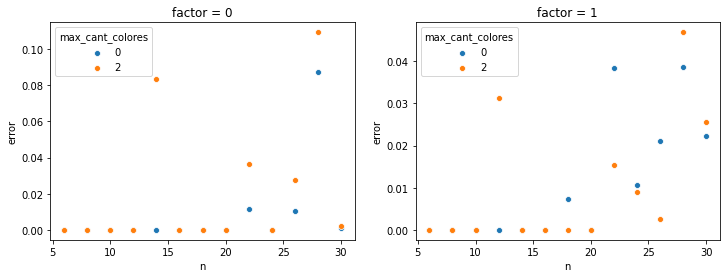

In [81]:
comp_vecindad0 = df_resultados_vec[df_resultados_vec["factor"] == 0].copy();
comp_vecindad1 = df_resultados_vec[df_resultados_vec["factor"] == 1].copy();

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('factor = 0')
axs[1].set_title('factor = 1')

axs[0].set(xlabel='n', ylabel='error');
axs[1].set(xlabel='n', ylabel='error');

axs[0] = sns.scatterplot(data=comp_vecindad0[comp_vecindad0["colores"] == 0], x='n', y='error', ax=axs[0])
axs[0] = sns.scatterplot(data=comp_vecindad0[comp_vecindad0["colores"] == 2], x='n', y='error', ax=axs[0])

axs[1] = sns.scatterplot(data=comp_vecindad1[comp_vecindad1["colores"] == 0], x='n', y='error', ax=axs[1])
axs[1] = sns.scatterplot(data=comp_vecindad1[comp_vecindad1["colores"] == 2], x='n', y='error', ax=axs[1])

axs[0].legend(title="max_cant_colores", labels=['0','2']);
axs[1].legend(title="max_cant_colores", labels=['0','2']);

plt.savefig("graficos/mh1_res_en_funcion_factor.svg")

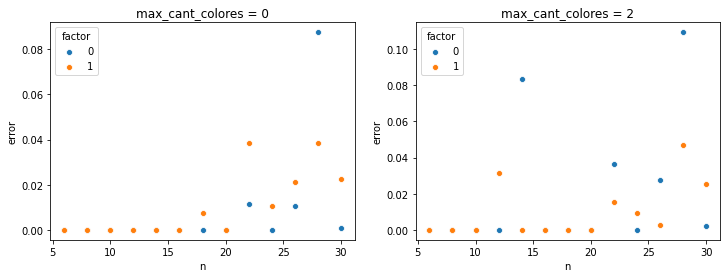

In [82]:
comp_vecindad2 = df_resultados_vec[df_resultados_vec["colores"] == 0].copy();
comp_vecindad3 = df_resultados_vec[df_resultados_vec["colores"] == 2].copy();

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('max_cant_colores = 0')
axs[1].set_title('max_cant_colores = 2')

axs[0].set(xlabel='n', ylabel='error');
axs[1].set(xlabel='n', ylabel='error');

axs[0] = sns.scatterplot(data=comp_vecindad2[comp_vecindad2["factor"] == 0], x='n', y='error', ax=axs[0])
axs[0] = sns.scatterplot(data=comp_vecindad2[comp_vecindad2["factor"] == 1], x='n', y='error', ax=axs[0])

axs[1] = sns.scatterplot(data=comp_vecindad3[comp_vecindad3["factor"] == 0], x='n', y='error', ax=axs[1])
axs[1] = sns.scatterplot(data=comp_vecindad3[comp_vecindad3["factor"] == 1], x='n', y='error', ax=axs[1])

axs[0].legend(title="factor", labels=['0','1']);
axs[1].legend(title="factor", labels=['0','1']);

plt.savefig("graficos/mh1_res_en_funcion_max_cant_colores.svg")

Correlación plt0: 0.44580368130424974
Correlación plt1: 0.7071773244227286
Correlación plt2: 0.29708742589948217
Correlación plt3: 0.6133043266881051


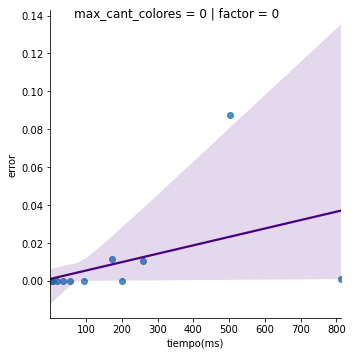

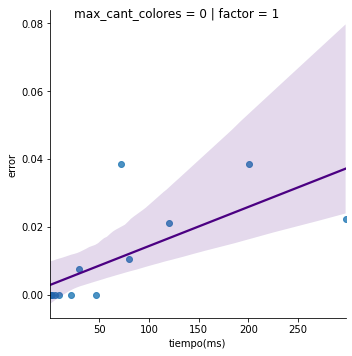

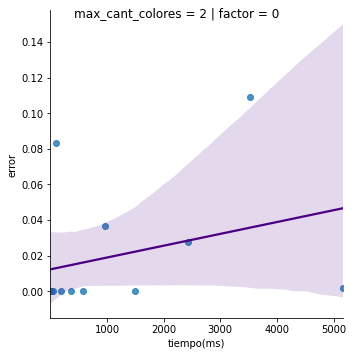

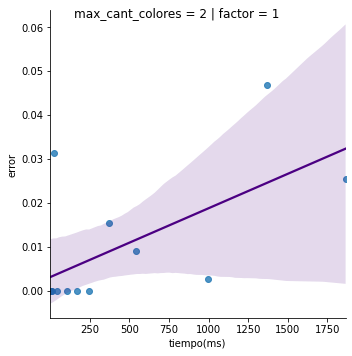

In [83]:
df_correlacion_err_0 = df_resultados_vec[(df_resultados_vec["colores"]== 0 ) & (df_resultados_vec["factor"]== 0 )].copy();
df_correlacion_err_1 = df_resultados_vec[(df_resultados_vec["colores"]== 0 ) & (df_resultados_vec["factor"]== 1 )].copy();
df_correlacion_err_2 = df_resultados_vec[(df_resultados_vec["colores"]== 2 ) & (df_resultados_vec["factor"]== 0 )].copy();
df_correlacion_err_3 = df_resultados_vec[(df_resultados_vec["colores"]== 2 ) & (df_resultados_vec["factor"]== 1 )].copy();

plt0 = sns.lmplot(data=df_correlacion_err_0, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt1 = sns.lmplot(data=df_correlacion_err_1, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt2 = sns.lmplot(data=df_correlacion_err_2, x="tiempo", y="error",line_kws={'color': 'indigo'})
plt3 = sns.lmplot(data=df_correlacion_err_3, x="tiempo", y="error",line_kws={'color': 'indigo'})

plt0.fig.suptitle('max_cant_colores = 0 | factor = 0')
plt1.fig.suptitle('max_cant_colores = 0 | factor = 1')
plt2.fig.suptitle('max_cant_colores = 2 | factor = 0')
plt3.fig.suptitle('max_cant_colores = 2 | factor = 1')

print("Correlación plt0:" , correlacion_pearson(df_correlacion_err_0, "tiempo", "error"));
print("Correlación plt1:" , correlacion_pearson(df_correlacion_err_1, "tiempo", "error"));
print("Correlación plt2:" , correlacion_pearson(df_correlacion_err_2, "tiempo", "error"));
print("Correlación plt3:" , correlacion_pearson(df_correlacion_err_3, "tiempo", "error"));

plt0.set(xlabel='tiempo(ms)', ylabel='error')
plt1.set(xlabel='tiempo(ms)', ylabel='error')
plt2.set(xlabel='tiempo(ms)', ylabel='error')
plt3.set(xlabel='tiempo(ms)', ylabel='error')

plt0.savefig("graficos/mh1_correlacion0_exp2.svg")
plt1.savefig("graficos/mh1_correlacion1_exp2.svg")
plt2.savefig("graficos/mh1_correlacion2_exp2.svg")
plt3.savefig("graficos/mh1_correlacion3_exp2.svg")

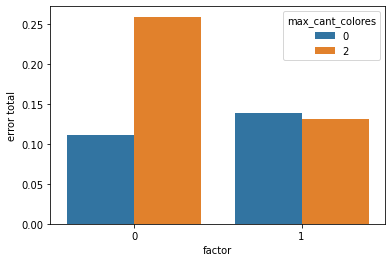

In [84]:
comp_vecindad3 = df_resultados_vec[df_resultados_vec["colores"] == 0].copy();
comp_vecindad4 = df_resultados_vec[df_resultados_vec["colores"] == 2].copy();

sum0 = comp_vecindad3[comp_vecindad3["factor"] == 0]["error"].sum()
sum1 = comp_vecindad3[comp_vecindad3["factor"] == 1]["error"].sum()

sum3 = comp_vecindad4[comp_vecindad4["factor"] == 0]["error"].sum()
sum4 = comp_vecindad4[comp_vecindad4["factor"] == 1]["error"].sum()

mat  = [[sum0, 0, 0],[sum1, 0, 1],[sum3, 2, 0],[sum4, 2, 1]]

info = pd.DataFrame(data = mat, columns=["Error total", "max_cant_colores", "factor"])

fig = sns.barplot(data=info, x='factor', y= 'Error total', hue = 'max_cant_colores')

fig.set(xlabel= 'factor', ylabel='error total')

plt.savefig("graficos/mh1_err_total_exp2.svg")